In [1]:
%load_ext autoreload
%autoreload 2

In [132]:
import os
import numpy as np
import json
import cv2

import torch
import torch.nn.functional as F
from torchvision.utils import save_image
import networkx as nx
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import webcolors

from minimal.imaging import draw_plan
from minimal.layout import LayoutGraph, NodeType
from minimal.gen import generate_plan

%matplotlib inline

In [149]:
NODE_COLOR = {
    0: "#EE4D4D",
    1: "#C67C7B",
    2: "#FFD274",
    3: "#BEBEBE",
    4: "#BFE3E8",
    5: "#7BA779",
    6: "#E87A90",
    7: "#FF8C69",
    9: "#1F849B",
    14: "#727171",
    15: "#785A67",
    16: "#D3A2C7",
}
NODE_NAME = {
    0: "L",
    1: "K",
    2: "R",
    3: "H",
    4: "A",
    5: "/",
    6: "/",
    7: "/",
    9: "/",
    14: ":F",
    15: "/",
    16: ":D",
}

In [88]:
g = LayoutGraph([4, 2, 2, 3, 1, 0, 16, 16, 16, 16, 16, 14], [(0, 5), (0, 7), (1, 5), (1, 6), (2, 5), (2, 8), (3, 5), (3, 9), (4, 5), (4, 10), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11)])

In [150]:
labels = { i: NODE_NAME[r] for i, r in enumerate(g.nodes) }
nodes = labels.keys()

In [151]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(g.edges)

In [152]:
node_color = [NODE_COLOR[g.nodes[k]] for k in G.nodes]

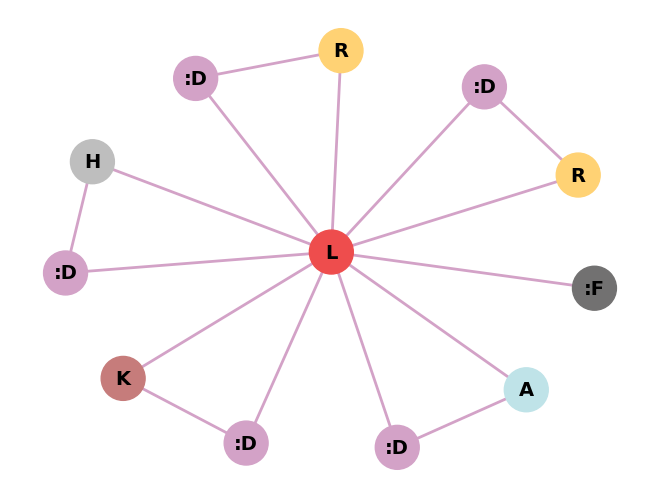

In [177]:
nx.draw(
    G,
    nx.kamada_kawai_layout(G),
    node_size=1000,
    node_color=node_colors,
    edge_color="#D3A2C7",
    font_color="black",
    font_weight="bold",
    font_size=14,
    width=2.0,
    with_labels=True,
    labels=labels
)